<a href="https://colab.research.google.com/github/Elwing-Chou/ml1206/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml1206/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml1206/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7faa0e3d1810>)

In [15]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")

In [16]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
datas = pd.concat([train, test], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
import re
n = "Braund, Mr. Owen Harris"
def nameflow(n):
    # print(n)
    pattern = r".+,(.+)\..+"
    # pattern = r"[A-Za-z\s'-]+,([A-Za-z\s]+)\.[A-Za-z\s]+"
    pat = re.compile(pattern)
    result = pat.match(n)
    return result.group(1).strip()
# datas["Name"].apply(nameflow)

In [19]:
# n = "Braund, Mr. Owen Harris"
def nameflow(n):
    return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(nameflow)
datas["Name"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Jonkheer          1
Sir               1
Don               1
Lady              1
Capt              1
the Countess      1
Mme               1
Name: Name, dtype: int64

In [20]:
dic = datas["Ticket"].value_counts()
def ticketflow(t):
    if pd.isna(t):
        return t
    else:
        return dic[t]
datas["Ticket"] = datas["Ticket"].apply(ticketflow)

In [21]:
def cabinflow(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinflow)
datas["Cabin"].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [22]:
# 篩選操作: S/D[跟你的資料筆數依樣多的True/False]
s = datas.isna().sum(axis=0)
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [23]:
# demo篩選
s = pd.Series([1, 2, 3])
s[[True, False, True]]
d = pd.DataFrame({
    "Age":[20, 30, 40],
    "Family":[1, 2, 3]
})
d[[True, True, False]]

,Age,Family
0,20,1
1,30,2


In [24]:
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [27]:
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)
s = datas.isna().sum(axis=0)
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [37]:
c = datas["Name"].value_counts()
reserved = c[c > 50].index
def nameflow2(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(nameflow2)

In [ ]:
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

In [43]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [47]:
# .iloc -> [第一筆, 第二筆....]
x = datas.iloc[:len(train)]
y = train["Survived"]
x_predict = datas.iloc[len(train):]
pid = test["PassengerId"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(11, 100, 2),
    "max_depth":[3, 4, 5, 6, 7]
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)

In [84]:
print(search.best_params_)
print(search.best_score_)

{'max_depth': 7, 'n_estimators': 43}
0.8440324594257179


In [153]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = RandomForestClassifier(max_depth=7, n_estimators=43)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.83333333 0.85393258 0.7752809  0.88764045 0.85393258 0.82022472
 0.84269663 0.78651685 0.85393258 0.85393258]
0.8361423220973784


In [167]:
clf = RandomForestClassifier(max_depth=7, n_estimators=43)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":pid,
    "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
imp = pd.DataFrame(clf.feature_importances_,
                   index=datas.columns,
                   columns=["Importance"])
imp.sort_values(by="Importance", ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y=train["Sex"], hue=train["Survived"])

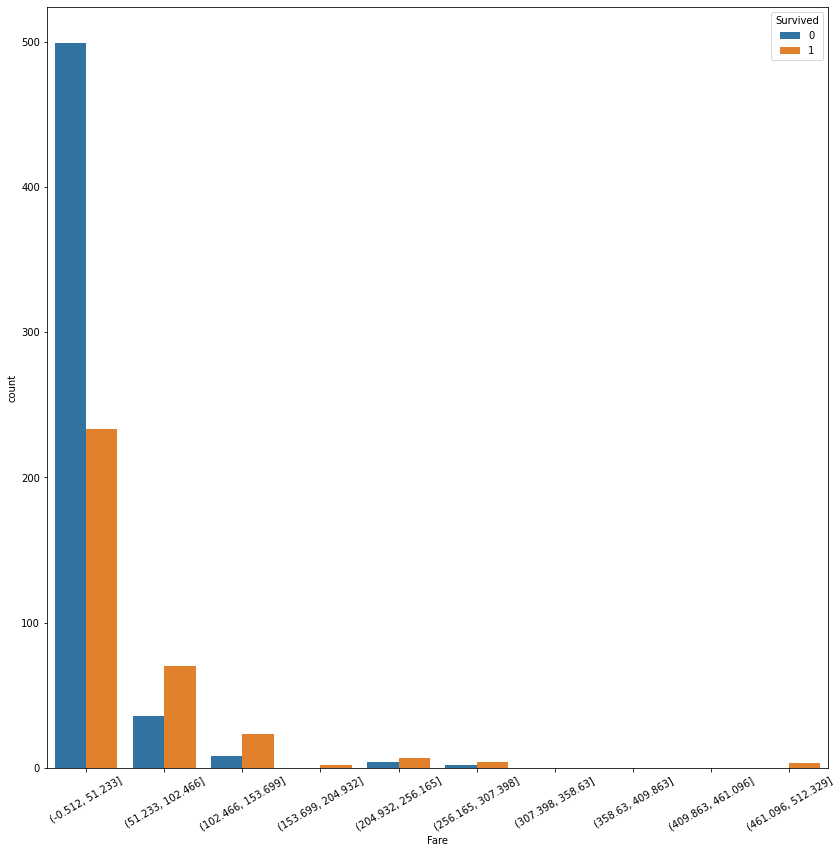

In [181]:
finterval = pd.cut(train["Fare"], bins=10)
plt.figure(figsize=(14, 14))
sns.countplot(x=finterval, hue=train["Survived"])
plt.xticks(rotation=30)
plt.legend(loc="upper right", title="Survived")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
datas_scale

In [159]:
x_scale = datas_scale.iloc[:len(train)]
x_predict_scale = datas_scale.iloc[len(train):]

In [162]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(2, 100)
}
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [166]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId":pid,
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
